## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Read CSV

In [3]:
data = pd.read_csv('customer_support_tickets.csv')

In [4]:
data.shape

(8469, 17)

In [84]:
# x_counts = data['Ticket Status'].value_counts()
# x_list = x_counts.index.tolist()
# print(x_list)

In [5]:
# data.head()

## Null values counts in each features

In [6]:
data.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

## Unique values counts in 'Customer Satisfaction Rating'

In [7]:
 data['Customer Satisfaction Rating'].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

## Rows having null values in any one or multiple columns

In [8]:
rows_with_nulls = data[data.isnull().any(axis=1)]
rows_with_nulls.shape

(5700, 17)

## Rows having not null values in any columns

In [9]:
rows_with_non_nulls = data[~data.isnull().any(axis=1)]
rows_with_non_nulls.shape

(2769, 17)

## Remove all rows having null values in any one or multiple columns

In [10]:
df = data.dropna()
df.shape

(2769, 17)

## Remove duplicate rows i.e. having exact same values in each features

In [11]:
df = df.drop_duplicates()
df.shape

(2769, 17)

## Objects columns label encoding

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     2769 non-null   int64  
 1   Customer Name                 2769 non-null   object 
 2   Customer Email                2769 non-null   object 
 3   Customer Age                  2769 non-null   int64  
 4   Customer Gender               2769 non-null   object 
 5   Product Purchased             2769 non-null   object 
 6   Date of Purchase              2769 non-null   object 
 7   Ticket Type                   2769 non-null   object 
 8   Ticket Subject                2769 non-null   object 
 9   Ticket Description            2769 non-null   object 
 10  Ticket Status                 2769 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               2769 non-null   object 
 13  Ticket C

In [13]:
df.select_dtypes(include=['object']).columns

Index(['Customer Name', 'Customer Email', 'Customer Gender',
       'Product Purchased', 'Date of Purchase', 'Ticket Type',
       'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution',
       'Ticket Priority', 'Ticket Channel', 'First Response Time',
       'Time to Resolution'],
      dtype='object')

In [14]:
label_encoders = {}

for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df.loc[:, column] = label_encoders[column].fit_transform(df[column])

In [82]:
df['Ticket Status'].value_counts()

Ticket Status
0    2769
Name: count, dtype: int64

In [16]:
label_encoders

{'Customer Name': LabelEncoder(),
 'Customer Email': LabelEncoder(),
 'Customer Gender': LabelEncoder(),
 'Product Purchased': LabelEncoder(),
 'Date of Purchase': LabelEncoder(),
 'Ticket Type': LabelEncoder(),
 'Ticket Subject': LabelEncoder(),
 'Ticket Description': LabelEncoder(),
 'Ticket Status': LabelEncoder(),
 'Resolution': LabelEncoder(),
 'Ticket Priority': LabelEncoder(),
 'Ticket Channel': LabelEncoder(),
 'First Response Time': LabelEncoder(),
 'Time to Resolution': LabelEncoder()}

## Make X (features) and y (target) datasets

In [17]:
X = df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Date of Purchase', 'Ticket Description', 'Resolution', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating'], axis=1)
y = df['Customer Satisfaction Rating']

In [18]:
X.shape

(2769, 8)

In [19]:
X.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel
2,48,2,10,4,8,0,2,3
3,27,0,25,0,0,0,2,3
4,67,0,5,0,3,0,2,1
10,48,1,30,1,3,0,1,2
11,51,1,27,2,15,0,1,0


In [20]:
y.shape

(2769,)

In [21]:
y.head()

2     3.0
3     3.0
4     1.0
10    1.0
11    1.0
Name: Customer Satisfaction Rating, dtype: float64

## Split X and y datasets into train and test datasets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1938, 8)
(831, 8)
(1938,)
(831,)


## Standardization of X_train and X_test dataset

In [24]:
scaler = StandardScaler()

In [25]:
X_train.head()

,Customer Age,Customer Gender,Product Purchased,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel
3701,59,2,7,4,12,0,0,2
4993,39,1,6,0,15,0,2,2
7594,69,1,39,1,2,0,1,1
3359,35,0,2,4,14,0,3,1
4136,57,0,25,0,8,0,1,0


In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [27]:
X_train[0:5]

array([[ 0.96330721,  1.28205508, -1.06506062,  1.35867431,  0.94040379,
         0.        , -1.31349499,  0.43870689],
       [-0.35483822,  0.04776658, -1.14567015, -1.4507264 ,  1.58356431,
         0.        ,  0.46474692,  0.43870689],
       [ 1.62237993,  0.04776658,  1.51444416, -0.74837622, -1.20346463,
         0.        , -0.42437404, -0.46099042],
       [-0.61846731, -1.18652192, -1.46810824,  1.35867431,  1.36917747,
         0.        ,  1.35386787, -0.46099042],
       [ 0.83149267, -1.18652192,  0.38591082, -1.4507264 ,  0.08285642,
         0.        , -0.42437404, -1.36068772]])

In [28]:
X_test[0:5]

array([[-0.21108478,  1.25886244,  1.42203448, -0.72657891,  0.43159271,
         0.        ,  0.47537752,  1.38414049],
       [-0.53920196,  1.25886244, -0.08953401,  1.38949728, -0.44370574,
         0.        ,  1.35324133, -1.33291639],
       [-0.40795509,  1.25886244, -0.42543812,  1.38949728, -0.22488113,
         0.        , -0.4024863 ,  1.38414049],
       [-0.14546134, -1.14323788,  0.66625024, -1.43193764, -0.22488113,
         0.        ,  0.47537752, -1.33291639],
       [-1.39230665, -1.14323788, -0.84531825, -1.43193764,  1.52571577,
         0.        ,  1.35324133, -1.33291639]])

## Fit and train RandomForestClassifier Model

In [29]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict X_test

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
y_pred[0:50]

array([4., 1., 3., 3., 2., 3., 1., 3., 5., 3., 4., 5., 5., 5., 1., 2., 2.,
       4., 3., 2., 2., 4., 2., 3., 3., 2., 4., 1., 4., 1., 3., 3., 1., 4.,
       2., 4., 3., 1., 2., 3., 1., 1., 4., 3., 1., 1., 4., 5., 3., 3.])

## Evaluating predictions

In [32]:
ac = accuracy_score(y_test, y_pred)
ac

0.2009626955475331

In [33]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

         1.0       0.17      0.18      0.18       168
         2.0       0.21      0.21      0.21       174
         3.0       0.22      0.24      0.23       175
         4.0       0.20      0.19      0.19       162
         5.0       0.21      0.19      0.20       152

    accuracy                           0.20       831
   macro avg       0.20      0.20      0.20       831
weighted avg       0.20      0.20      0.20       831



In [34]:
y_test.value_counts()

Customer Satisfaction Rating
3.0    175
2.0    174
1.0    168
4.0    162
5.0    152
Name: count, dtype: int64

In [35]:
unique_values, counts = np.unique(y_pred, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(value_counts)

{1.0: 172, 2.0: 173, 3.0: 195, 4.0: 153, 5.0: 138}


In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[30, 44, 38, 31, 25],
       [37, 36, 41, 29, 31],
       [39, 27, 42, 41, 26],
       [33, 34, 38, 30, 27],
       [33, 32, 36, 22, 29]], dtype=int64)

In [37]:
bias = rfc.score(X_train, y_train)
bias

1.0

In [38]:
variance = rfc.score(X_test, y_test)
variance

0.2009626955475331

## Fit and train X_train and y_train on multiple classification models and find best model

In [39]:
models = {
    'logc': LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000),
    'rfc': RandomForestClassifier(random_state=42),
    'knc': KNeighborsClassifier(n_neighbors=5),
    'linsvc': LinearSVC(random_state=42, dual=False, multi_class='ovr'),
    'svc': SVC(random_state=42, kernel='rbf', probability=True),
    'dtc': DecisionTreeClassifier(random_state=42),
    'gbc': GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': ac
    })

results_df = pd.DataFrame(results)
# results_df.to_csv('model_evaluation_results.csv', index=False)
results_df

,Model,MAE,MSE,R2,Accuracy
0,logc,1.540313,3.740072,-0.926044,0.215403
1,rfc,1.557160,3.797834,-0.955790,0.200963
2,knc,1.587244,3.979543,-1.049365,0.200963
3,linsvc,1.536703,3.736462,-0.924185,0.219013
4,svc,1.581227,3.882070,-0.999169,0.202166
5,dtc,1.575211,3.919374,-1.018380,0.211793
6,gbc,1.555957,3.813478,-0.963846,0.211793


## Find top  issues

In [40]:
# Identify common issues
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Battery life             542
Network problem          539
Installation support     530
Product setup            529
Payment issue            526
Name: count, dtype: int64


## Convert objects columns into date-time and extract 'Year-Month'. groupby('YearMonth') and line-plot

In [41]:
# Plotting ticket trends over time
data['First Response Time'] = pd.to_datetime(data['First Response Time'], format='%Y-%m-%d %H:%M:%S') # datetime64[ns]
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], format='%Y-%m-%d %H:%M:%S') # datetime64[ns]
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'], format='%Y-%m-%d') # datetime64[ns]
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M') # period[M]

In [42]:
ticket_trends = data.groupby('YearMonth').size()

In [43]:
ticket_trends.head()

YearMonth
2020-01    377
2020-02    376
2020-03    324
2020-04    354
2020-05    322
Freq: M, dtype: int64

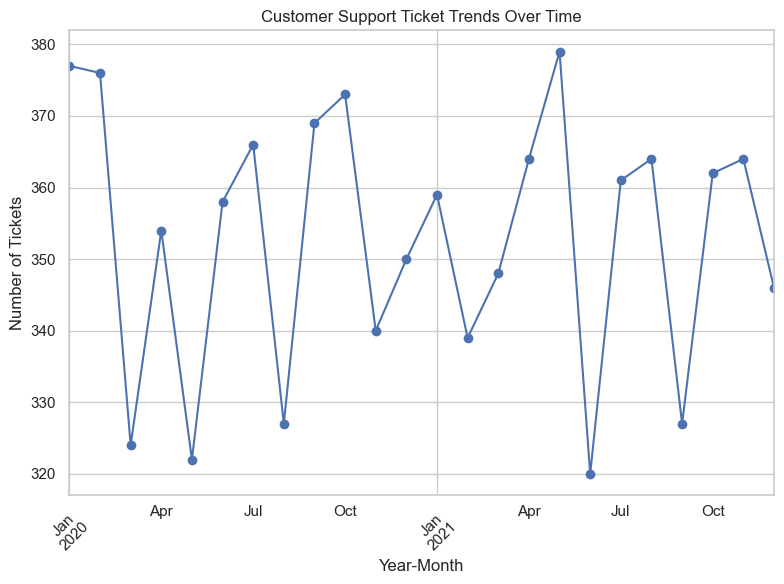

In [85]:
plt.figure(figsize=(8, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## groupby('Ticket Type')

In [45]:
# Segment customers
# Segment based on ticket types
ticket_type_segmentation = data.groupby('Ticket Type').size()
ticket_type_segmentation

Ticket Type
Billing inquiry         1634
Cancellation request    1695
Product inquiry         1641
Refund request          1752
Technical issue         1747
dtype: int64

## groupby('Customer Satisfaction Rating') and histplot

In [46]:
# Segment based on satisfaction levels
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
satisfaction_segmentation

Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64

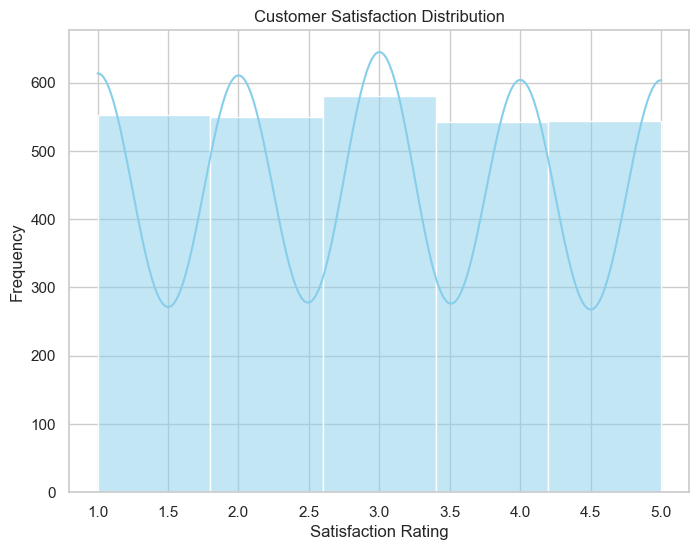

In [47]:
# Set up the plotting aesthetics
sns.set(style="whitegrid")

#Customer Satisfaction Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

## Ticket Status distribution and pie chart

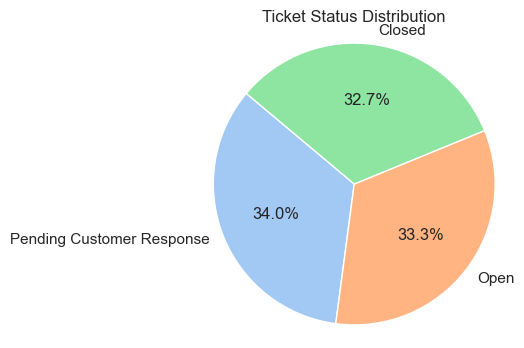

In [48]:
#Ticket Status Distribution

ticket_status_distribution = data['Ticket Status'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

In [49]:
ticket_status_distribution

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

## Age distribution and histplot

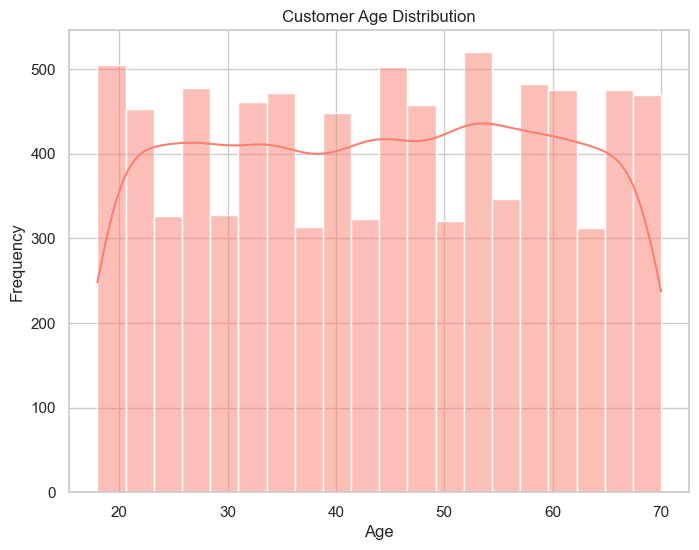

In [50]:
#Customer Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True, color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Customer Gender distribution and pie plot

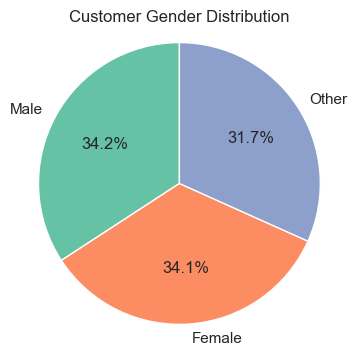

In [51]:
#Customer Gender Distribution
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(customer_gender_distribution, labels=customer_gender_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

In [52]:
customer_gender_distribution

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

## Ticket Channel distribution and barplot

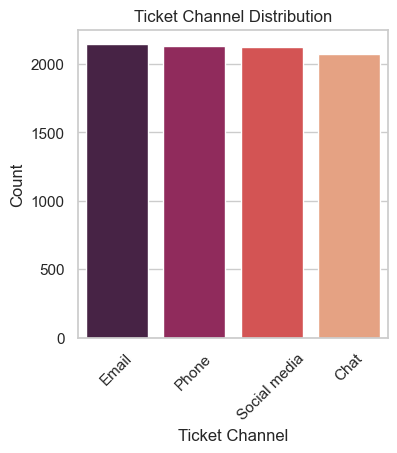

In [53]:
#Ticket Channel Distribution
plt.figure(figsize=(4, 4))
ticket_channel_distribution = data['Ticket Channel'].value_counts()
sns.barplot(x=ticket_channel_distribution.index, hue=ticket_channel_distribution.index, y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [54]:
ticket_channel_distribution

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

## Average Satisfaction Rating by Gender

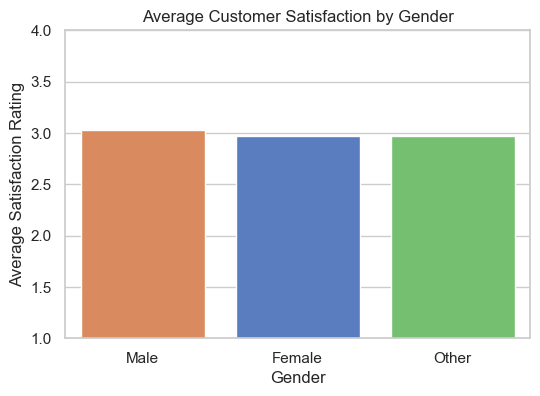

In [55]:
# Average Customer Satisfaction by Gender (Bar Plot)

average_satisfaction = data.groupby('Customer Gender')['Customer Satisfaction Rating'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', hue='Customer Gender', data=average_satisfaction, palette='muted', order=['Male', 'Female', 'Other'])
plt.title('Average Customer Satisfaction by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Rating')
plt.ylim(1, 4) # Adjust y-axis limit if needed
plt.show()

In [56]:
average_satisfaction

,Customer Gender,Customer Satisfaction Rating
0,Female,2.971545
1,Male,3.028384
2,Other,2.974684


## Top 10 Products Purchased

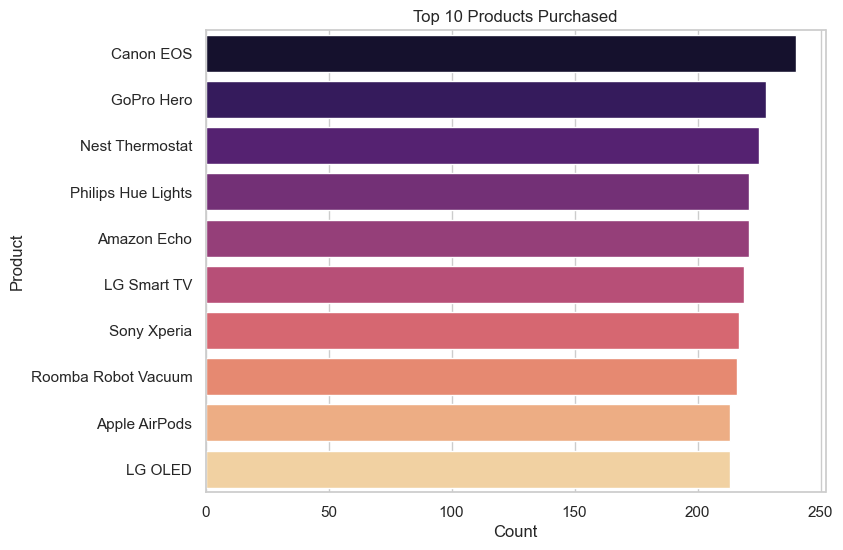

In [57]:
#Product Purchased Distribution

plt.figure(figsize=(8, 6))
product_purchased_distribution = data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index, hue=product_purchased_distribution.index, x=product_purchased_distribution, palette='magma')
plt.title('Top 10 Products Purchased')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

In [58]:
product_purchased_distribution

Product Purchased
Canon EOS              240
GoPro Hero             228
Nest Thermostat        225
Philips Hue Lights     221
Amazon Echo            221
LG Smart TV            219
Sony Xperia            217
Roomba Robot Vacuum    216
Apple AirPods          213
LG OLED                213
Name: count, dtype: int64

## Top Items Purchased by Genders (Male, Female, Other) (Horizontal Bar Chart)

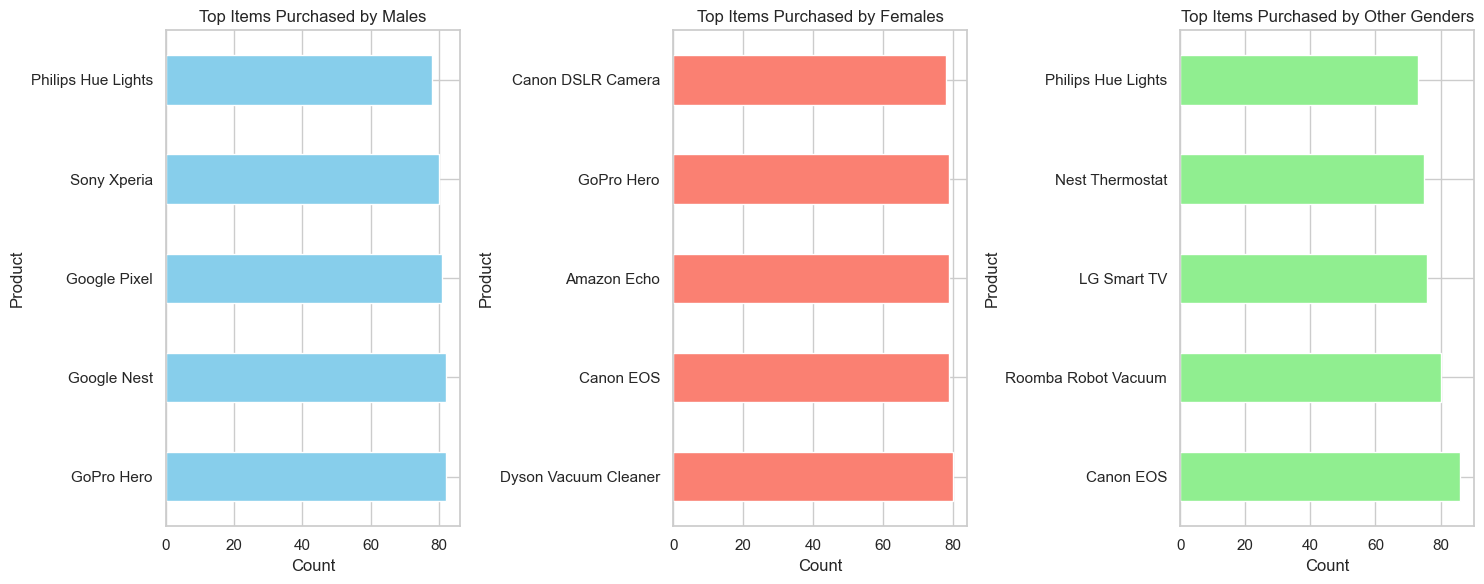

In [59]:
# Top Items Purchased by Gender (Horizontal Bar Chart)
plt.figure(figsize=(15, 6))

# Top Items Purchased by Males
plt.subplot(1, 3, 1)
top_items_male = data[data['Customer Gender'] == 'Male']['Product Purchased'].value_counts().head(5)
top_items_male.plot(kind='barh', color='skyblue')
plt.title('Top Items Purchased by Males')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Females
plt.subplot(1, 3, 2)
top_items_female = data[data['Customer Gender'] == 'Female']['Product Purchased'].value_counts().head(5)
top_items_female.plot(kind='barh', color='salmon')
plt.title('Top Items Purchased by Females')
plt.xlabel('Count')
plt.ylabel('Product')

# Top Items Purchased by Other Gender
plt.subplot(1, 3, 3)
top_items_other = data[data['Customer Gender'] == 'Other']['Product Purchased'].value_counts().head(5)
top_items_other.plot(kind='barh', color='lightgreen')
plt.title('Top Items Purchased by Other Genders')
plt.xlabel('Count')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [60]:
top_items_male

Product Purchased
GoPro Hero            82
Google Nest           82
Google Pixel          81
Sony Xperia           80
Philips Hue Lights    78
Name: count, dtype: int64

In [61]:
top_items_female

Product Purchased
Dyson Vacuum Cleaner    80
Canon EOS               79
Amazon Echo             79
GoPro Hero              79
Canon DSLR Camera       78
Name: count, dtype: int64

In [62]:
top_items_other

Product Purchased
Canon EOS              86
Roomba Robot Vacuum    80
LG Smart TV            76
Nest Thermostat        75
Philips Hue Lights     73
Name: count, dtype: int64

## Ticket Type Distribution and Pie Plot

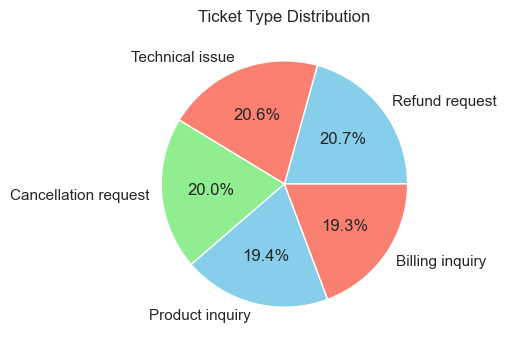

In [63]:
# Count ticket types
ticket_type_distribution = data['Ticket Type'].value_counts()
plt.figure(figsize=(4, 4))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

In [64]:
ticket_type_distribution

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

## Ticket Priority distribution and Pie Plot

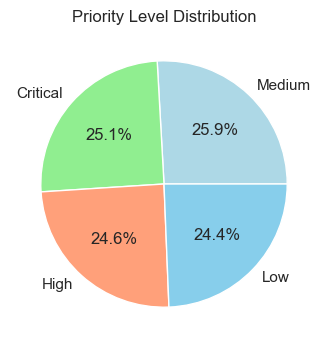

In [65]:
# Count ticket priorities
priority_distribution = data['Ticket Priority'].value_counts()
plt.figure(figsize=(4, 4))
priority_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

In [66]:
priority_distribution

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

## Number of Tickets Raised by Age Groups | pd.cut() | barplot

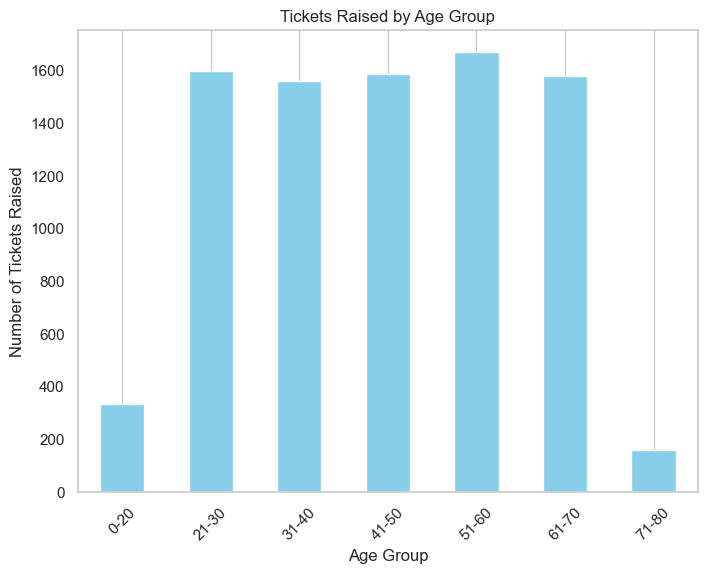

In [67]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Categorize customers into age groups
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins, labels=labels, right=False)

# Calculate number of tickets raised by each age group
tickets_by_age_group = data.groupby('Age Group', observed=True).size()

# Plot
plt.figure(figsize=(8, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [68]:
data[['Customer Age', 'Age Group']].head()

,Customer Age,Age Group
0,32,31-40
1,42,41-50
2,48,41-50
3,27,21-30
4,67,61-70


In [69]:
tickets_by_age_group

Age Group
0-20      332
21-30    1596
31-40    1556
41-50    1585
51-60    1669
61-70    1575
71-80     156
dtype: int64

## Distribution of Ticket Types by Age | sns.FacetGrid() | histplot

In [70]:
# Replace inf values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

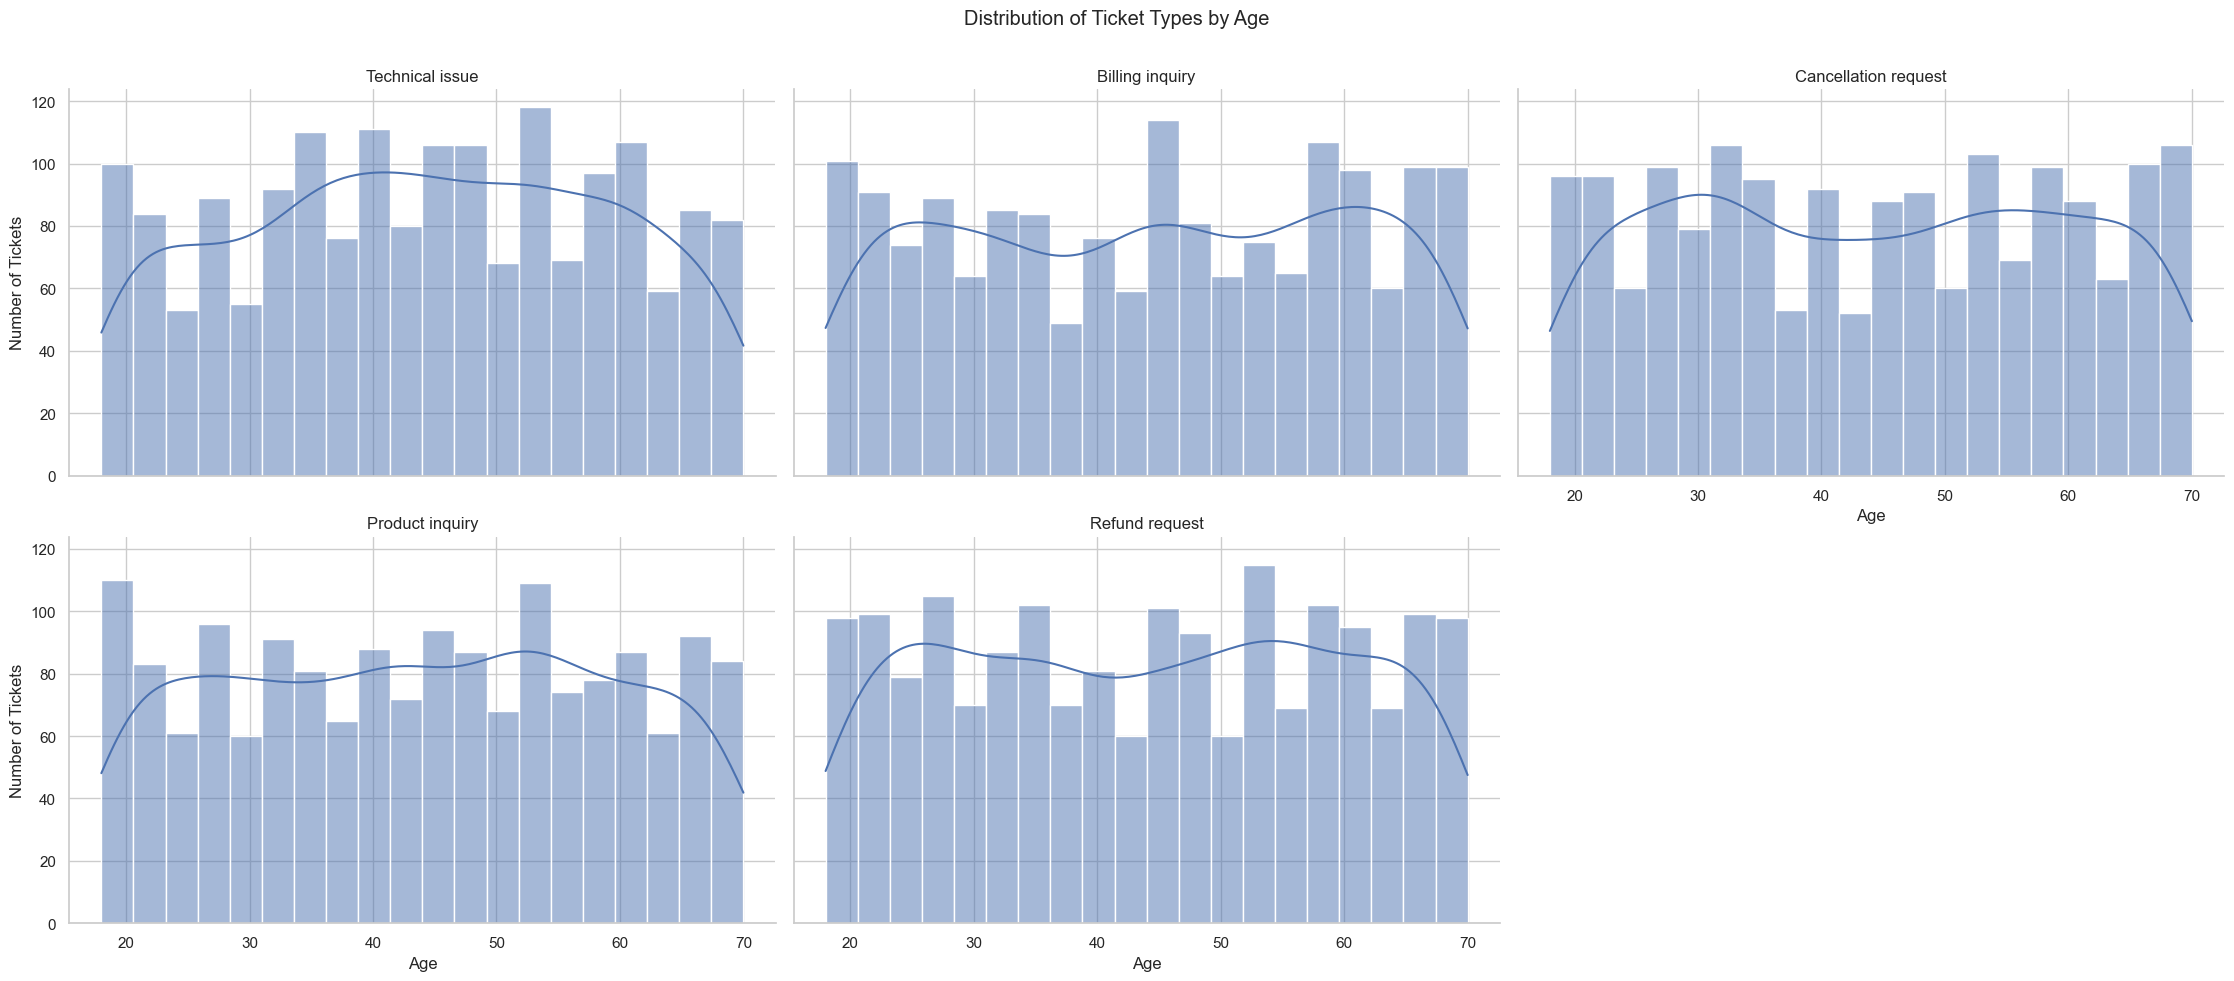

In [71]:
# Create a facet grid for each ticket type
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3, height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9) # Adjust layout
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()